# Insurance fraud Detection

#### The insurance industry involves the sale of insurance policies to individuals and businesses, which provide financial protection against potential losses or damages. Fraud can occur in the insurance industry in a variety of ways, including false or exaggerated claims, fake policies, and identity theft. Insurers use a variety of tools and techniques, including data analysis and machine learning, to detect and prevent fraudulent activity.

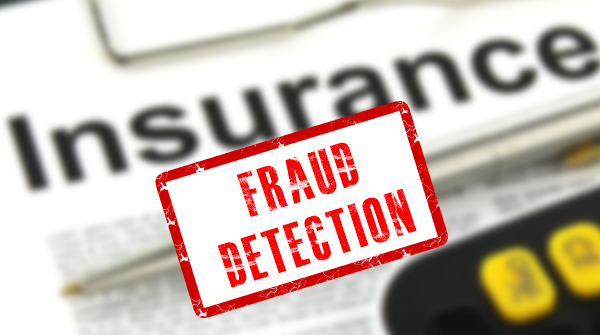



In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'E:\insuranceFraud_Dataset.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
data.replace('?', np.nan, inplace=True)

In [5]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Checking the NULL Value

In [7]:
data.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

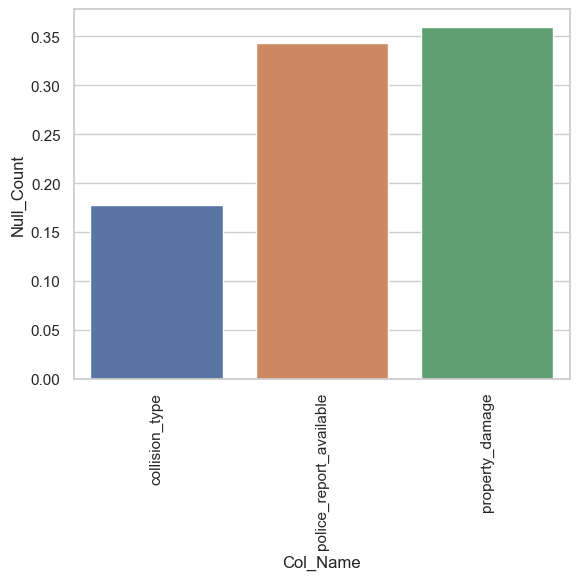

In [8]:
missing = data.isnull().sum() / len(data) 
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing = missing.to_frame()
missing.columns = ['Null_Count']
missing.index.names=['Col_Name']
missing = missing.reset_index()
sns.set(style='whitegrid' , color_codes=True)
sns.barplot(x='Col_Name', y='Null_Count', data=missing)
plt.xticks(rotation=90)
plt.show()

### Filling the NULL Value with Zero

In [9]:
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode()[0])

In [10]:
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode()[0])

In [11]:
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode()[0])

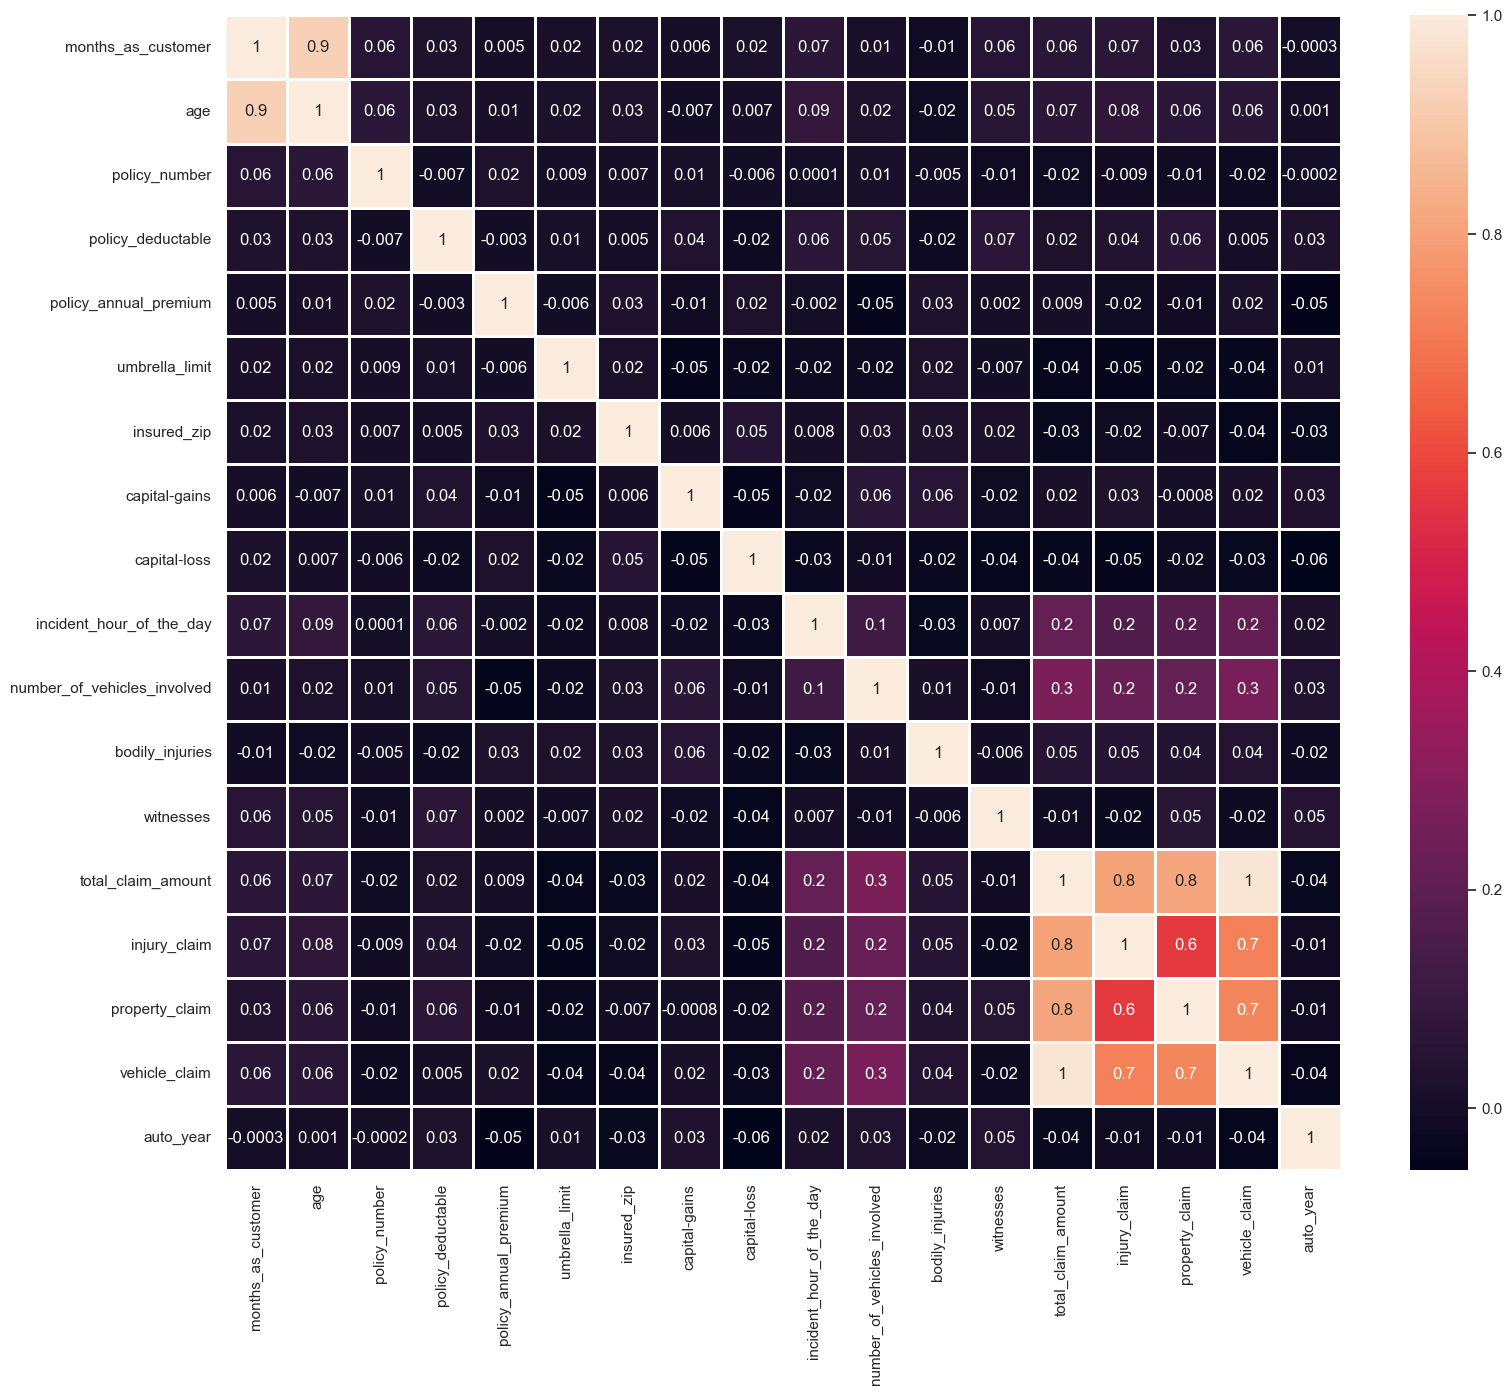

In [12]:
plt.figure(figsize = (18, 15))

corr = data.corr()

sns.heatmap(data = corr, annot = True, fmt = '.1g', linewidth = 2)
plt.show()

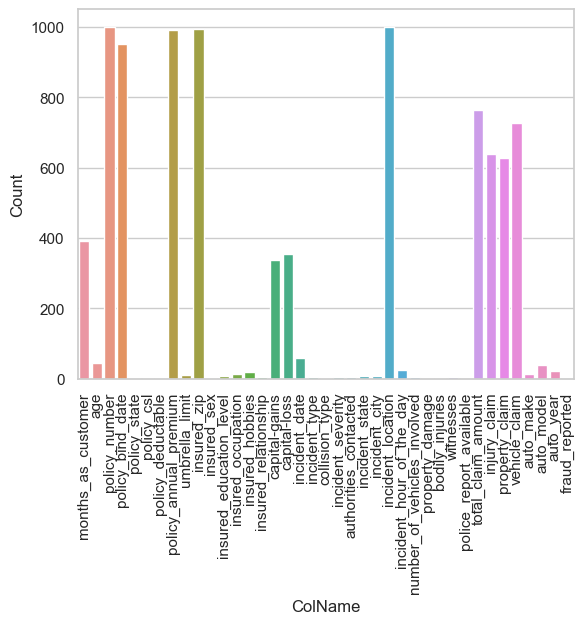

In [13]:
unique = data.nunique().to_frame()
unique.columns = ['Count']
unique.index.names = ['ColName']
unique = unique.reset_index()
sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='ColName', y='Count', data=unique)
plt.xticks(rotation=90)
plt.show()

In [14]:
unique.sort_values(by='Count' , ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [15]:
# Drop Columns that are not used in our project
to_drop =  ['policy_number', 'policy_bind_date', 
         'policy_state', 'insured_zip', 'incident_location', 
         'incident_date', 'incident_state', 'incident_city', 
         'insured_hobbies', 'auto_make', 'auto_model', 
         'auto_year'] 

data.drop(to_drop, inplace=True, axis= 1)

In [16]:
data.head()

ColName,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


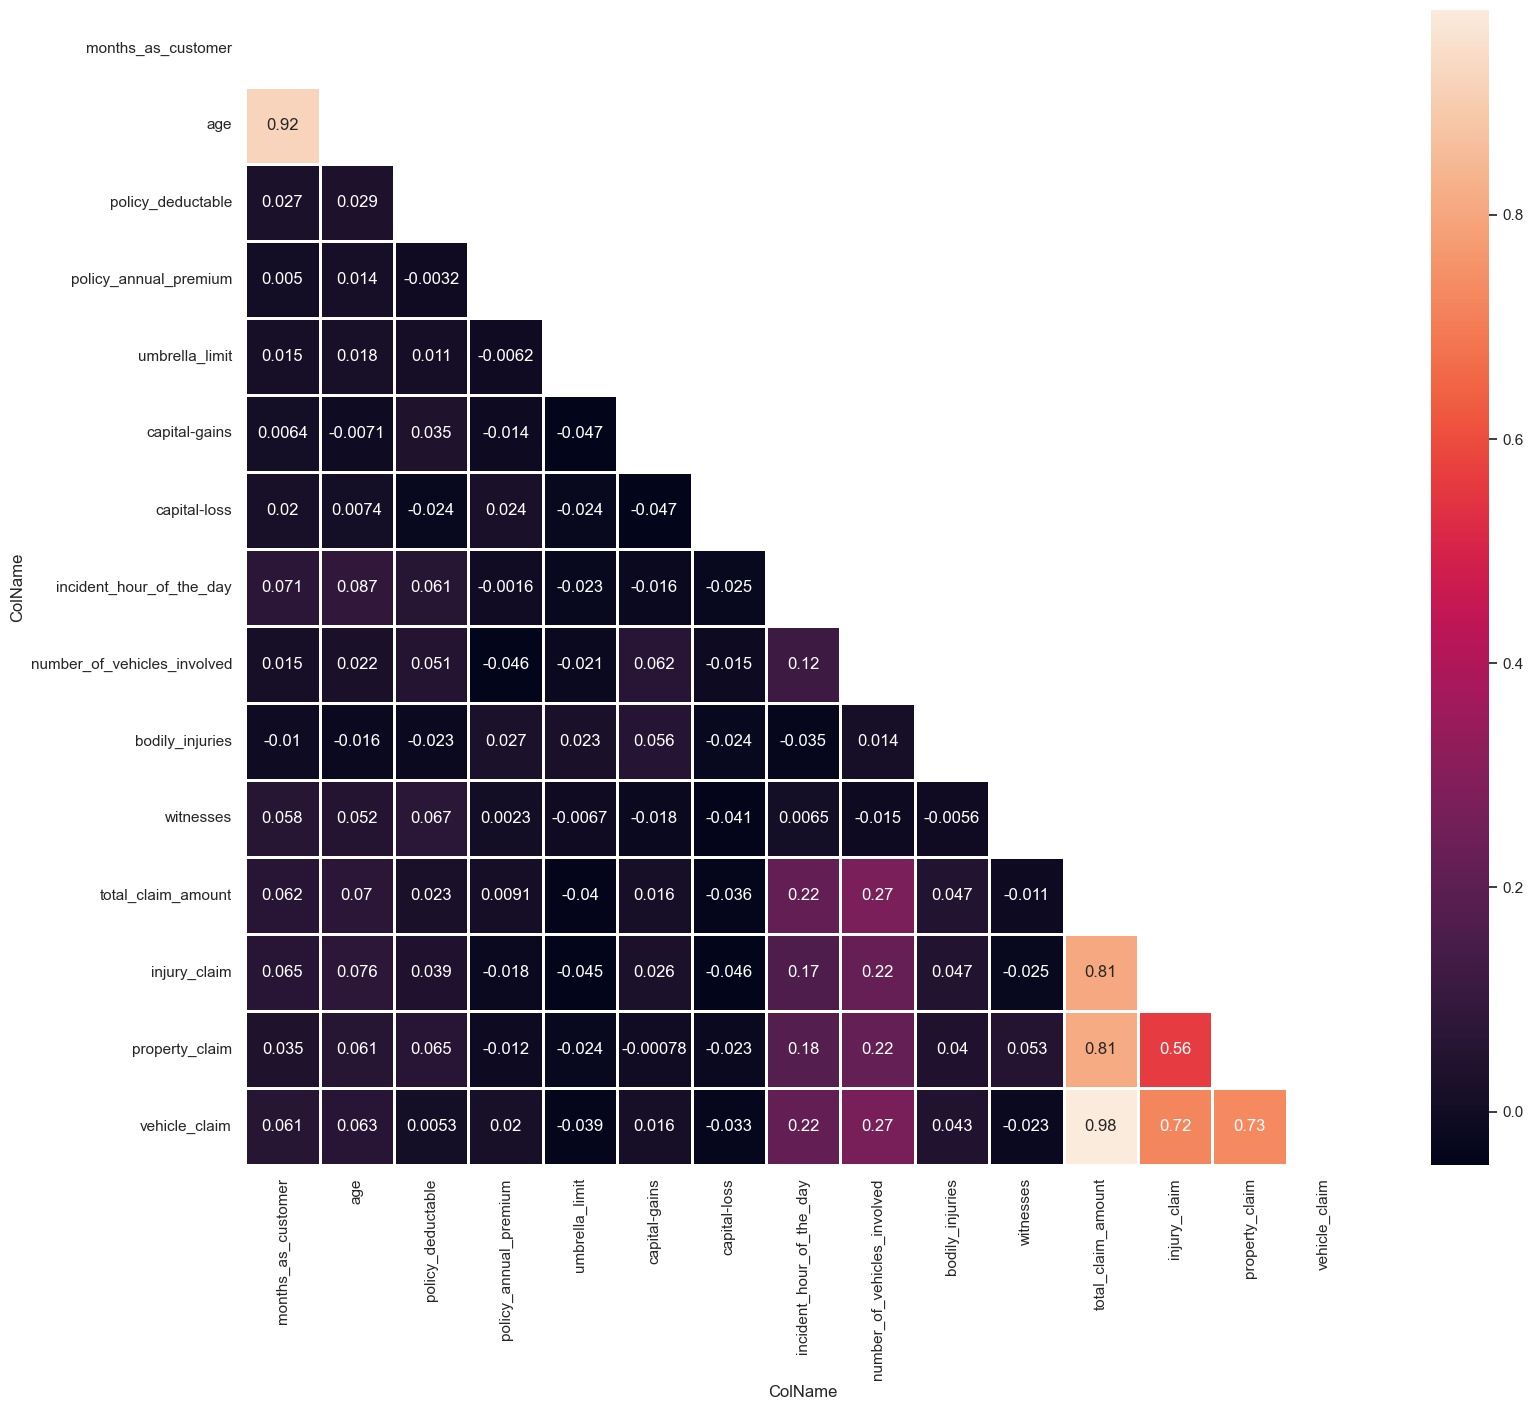

In [17]:
plt.figure(figsize = (18, 15))

corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask =  mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [18]:
data.drop(columns = ['age' , 'total_claim_amount'], inplace = True, axis = 1)

In [19]:
data.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [20]:
# Get Target and Independent Features Separated
X = data.drop('fraud_reported', axis = 1)
y = data['fraud_reported']

In [21]:
# Converting Label Columns into Numerical by doing One-Encoding
categorical_cols = X.select_dtypes(include = ['object'])
categorical_cols = pd.get_dummies(categorical_cols, drop_first = True)
categorical_cols.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [22]:
numerical_col = X.select_dtypes(include = ['int64'])
X = pd.concat([numerical_col, categorical_cols], axis = 1)

In [23]:
X.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


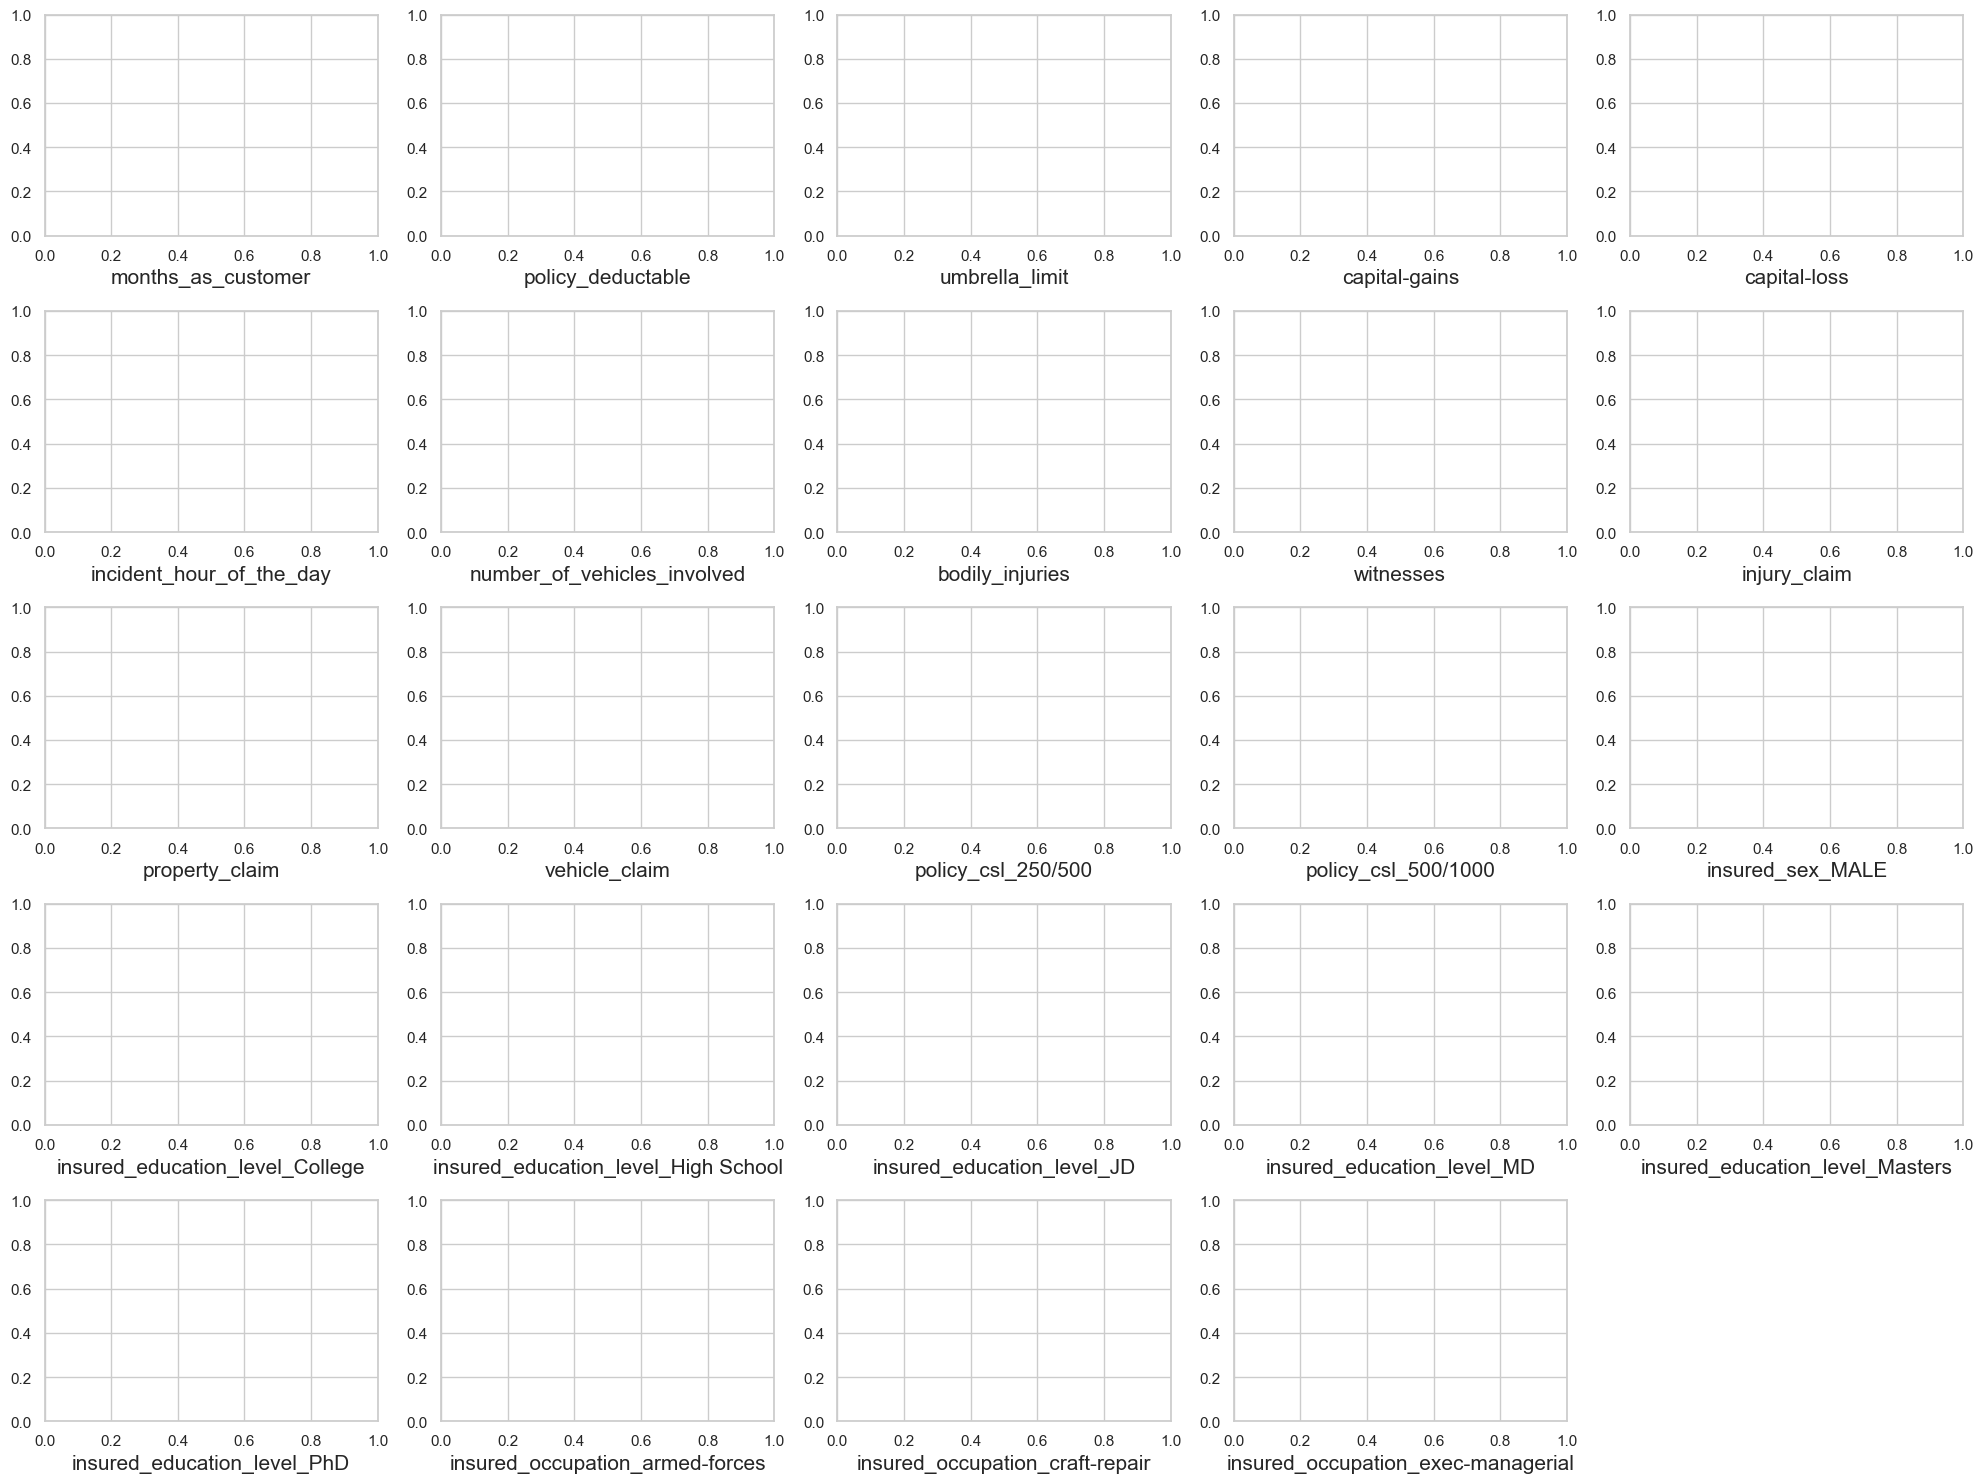

In [24]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot = (X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
plt.tight_layout()
plt.show()

### Outliers are in there, so we need to Standarise those columns using Standard Scaler

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [26]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
271,271,1000,0,71200,0,6,1,0,0,560,...,0,1,0,0,0,1,0,0,0,0
910,285,2000,0,46100,0,9,1,1,2,3720,...,1,1,0,0,0,0,0,1,0,1
253,440,500,0,41500,-70200,21,1,2,3,5960,...,1,0,0,0,1,0,0,0,0,0
666,344,1000,0,0,-38700,18,3,2,2,17400,...,1,0,0,0,1,0,0,0,0,1
96,325,1000,0,61500,0,11,1,0,3,6630,...,1,0,0,0,1,0,0,0,1,0


In [27]:
numerical_data = X_train[['months_as_customer', 'policy_deductable',
                          'umbrella_limit', 'capital-gains', 'capital-loss'
                          ,'incident_hour_of_the_day' , 'number_of_vehicles_involved' , 
                          'bodily_injuries' , 'witnesses' ,'injury_claim',
                           'property_claim', 'vehicle_claim']]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)


In [29]:
scaler_num_df = pd.DataFrame(data = scaled_data, columns = numerical_data.columns, index = X_train.index)
scaler_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
271,0.580503,-0.233187,-0.479639,1.647798,0.953308,-0.784119,-0.807601,-1.204610,-1.321890,-1.400931,-1.457274,-1.850367
910,0.702780,1.401304,-0.479639,0.748047,0.953308,-0.356625,-0.807601,0.022914,0.469289,-0.750261,-0.744245,-0.606849
253,2.056565,-1.050433,-0.479639,0.583153,-1.533077,1.353351,-0.807601,1.250438,1.364879,-0.289026,-0.279947,0.212410
666,1.218092,-0.233187,-0.479639,-0.904482,-0.417392,0.925857,1.152596,1.250438,0.469289,2.066563,0.889089,0.456933
96,1.052144,-0.233187,-0.479639,1.300085,0.953308,-0.071629,-0.807601,-1.204610,1.364879,-0.151068,-0.141072,1.150273


In [30]:
X_train.drop(columns= scaler_num_df.columns, inplace = True)

In [31]:
X_train = pd.concat([scaler_num_df, X_train], axis = 1)

In [32]:
X_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
271,0.580503,-0.233187,-0.479639,1.647798,0.953308,-0.784119,-0.807601,-1.204610,-1.321890,-1.400931,...,0,1,0,0,0,1,0,0,0,0
910,0.702780,1.401304,-0.479639,0.748047,0.953308,-0.356625,-0.807601,0.022914,0.469289,-0.750261,...,1,1,0,0,0,0,0,1,0,1
253,2.056565,-1.050433,-0.479639,0.583153,-1.533077,1.353351,-0.807601,1.250438,1.364879,-0.289026,...,1,0,0,0,1,0,0,0,0,0
666,1.218092,-0.233187,-0.479639,-0.904482,-0.417392,0.925857,1.152596,1.250438,0.469289,2.066563,...,1,0,0,0,1,0,0,0,0,1
96,1.052144,-0.233187,-0.479639,1.300085,0.953308,-0.071629,-0.807601,-1.204610,1.364879,-0.151068,...,1,0,0,0,1,0,0,0,1,0


## Modelling

## - Support Vector Classifier

In [33]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_model_train_acc = accuracy_score (y_train, svc_model. predict (X_train)) 
svc_model_test_acc = accuracy_score (y_test, y_pred)

print("Training Accuracy: ", svc_model_train_acc) 
print("Testing Accuracy: ", svc_model_test_acc) 
print (confusion_matrix (y_test, y_pred)) 
print (classification_report (y_test, y_pred))

Training Accuracy:  0.844
Testing Accuracy:  0.72
[[180   0]
 [ 70   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       180
           Y       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



## K-Nearest Neighbor

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=30)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model_train_acc = accuracy_score(y_train, knn_model.predict(X_train)) 
knn_model_test_acc =  accuracy_score (y_test, y_pred)

print("Training Accuracy: ", knn_model_train_acc) 
print("Testing Accuracy: ", knn_model_test_acc) 
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Training Accuracy:  0.764
Testing Accuracy:  0.72
[[180   0]
 [ 70   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       180
           Y       0.00      0.00      0.00        70

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.60       250



## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_pred = decision_tree_model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score (y_train, decision_tree_model.predict(X_train)) 
decision_tree_model_test_acc = accuracy_score (y_test, y_pred)

print("Training accuracy: ",decision_tree_model_train_acc)
print("Test accuracy: ",decision_tree_model_test_acc)
print (confusion_matrix (y_test, y_pred)) 
print (classification_report (y_test, y_pred))

Training accuracy:  1.0
Test accuracy:  0.628
[[141  39]
 [ 54  16]]
              precision    recall  f1-score   support

           N       0.72      0.78      0.75       180
           Y       0.29      0.23      0.26        70

    accuracy                           0.63       250
   macro avg       0.51      0.51      0.50       250
weighted avg       0.60      0.63      0.61       250



### Not Getting a Good Accuracy So Now Doing the Hyperperameter Tunning

In [39]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10], 
    'min_samples_split' : range (2, 10, 1), 
    'min_samples_leaf': range (2, 10, 1)
}

grid_search = GridSearchCV (decision_tree_model, grid_params, cv = 5, n_jobs = -1, verbose= 1) 
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [40]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.8093333333333333


In [41]:
decision_tree_model = grid_search.best_estimator_ 
y_pred =  decision_tree_model.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

decision_tree_model_train_acc = accuracy_score (y_train, decision_tree_model.predict(X_train)) 
decision_tree_model_test_acc = accuracy_score (y_test, y_pred)
print (f"Training accuracy of Decision Tree is : {decision_tree_model_train_acc}") 
print("Test accuracy of Decision Tree is : {decision_tree_model_test_acc}")
print(confusion_matrix (y_test, y_pred)) 
print(classification_report (y_test, y_pred))

Training accuracy of Decision Tree is : 0.816
Test accuracy of Decision Tree is : {decision_tree_model_test_acc}
[[152  28]
 [ 23  47]]
              precision    recall  f1-score   support

           N       0.87      0.84      0.86       180
           Y       0.63      0.67      0.65        70

    accuracy                           0.80       250
   macro avg       0.75      0.76      0.75       250
weighted avg       0.80      0.80      0.80       250



## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier (criterion= 'entropy', max_depth= 15, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 14) 
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_model_train_acc = accuracy_score (y_train, rf_model.predict(X_train)) 

rf_model_test_acc = accuracy_score(y_test, y_pred)

print("Training accuracy: ", rf_model_train_acc) 
print("Test accuracy: ", rf_model_test_acc)
print (confusion_matrix (y_test, y_pred)) 
print (classification_report (y_test, y_pred))

Training accuracy:  0.9866666666666667
Test accuracy:  0.728
[[150  30]
 [ 38  32]]
              precision    recall  f1-score   support

           N       0.80      0.83      0.82       180
           Y       0.52      0.46      0.48        70

    accuracy                           0.73       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.72      0.73      0.72       250



## Ada Boost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(base_estimator = decision_tree_model)

parameters = {
     'n_estimators' : [50, 70, 90, 120, 180, 200],
     'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
     'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada_model, parameters, n_jobs = -1, cv= 5, verbose = 1)  
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [46]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}
0.8093333333333333


In [47]:
ada_model = grid_search.best_estimator_
y_pred = ada_model.predict(X_test)

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Ada Boost is : {ada_train_acc}") 
print(f"Test accuracy of Ada Boost is : {ada_test_acc}")

print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred)) 

Training accuracy of Ada Boost is : 0.8493333333333334
Test accuracy of Ada Boost is : 0.732
[[179   1]
 [ 66   4]]
              precision    recall  f1-score   support

           N       0.73      0.99      0.84       180
           Y       0.80      0.06      0.11        70

    accuracy                           0.73       250
   macro avg       0.77      0.53      0.47       250
weighted avg       0.75      0.73      0.64       250



## Gradient Boosting Classifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier() 
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier
gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score (y_train, gb.predict(X_train))}")
print (f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print (f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n") 
print (f"Classification Report - \n {classification_report (y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9333333333333333
Test Accuracy of Gradient Boosting Classifier is 0.692 

Confusion Matrix :- 
[[160  20]
 [ 57  13]]

Classification Report - 
               precision    recall  f1-score   support

           N       0.74      0.89      0.81       180
           Y       0.39      0.19      0.25        70

    accuracy                           0.69       250
   macro avg       0.57      0.54      0.53       250
weighted avg       0.64      0.69      0.65       250



In [50]:
sgb = GradientBoostingClassifier(subsample =  0.90, max_features = 0.70)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier
sgb_acc = accuracy_score (y_test, sgb.predict(X_test))

print (f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score (y_train, sgb.predict(X_train))}") 
print (f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print (f"Confusion Matrix :- \n {confusion_matrix (y_test, sgb.predict(X_test))}\n") 
print (f"Classification Report - \n {classification_report (y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 0.94
Test Accuracy of Stochastic Gradient Boosting is 0.628 

Confusion Matrix :- 
 [[109  71]
 [ 22  48]]

Classification Report - 
               precision    recall  f1-score   support

           N       0.83      0.61      0.70       180
           Y       0.40      0.69      0.51        70

    accuracy                           0.63       250
   macro avg       0.62      0.65      0.60       250
weighted avg       0.71      0.63      0.65       250



## Xgboost Clasifier

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [52]:
y_test = le.fit_transform(y_test)

In [53]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [54]:
xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))

xgb_test_acc = accuracy_score(y_test, y_pred)

print (f"Training accuracy of XgBoost is: {xgb_train_acc}") 
print(f"Test accuracy of XgBoost is {xgb_test_acc}")
print(confusion_matrix(y_test, y_pred)) 
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is: 1.0
Test accuracy of XgBoost is 0.756
[[150  30]
 [ 31  39]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       180
           1       0.57      0.56      0.56        70

    accuracy                           0.76       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.75      0.76      0.76       250



In [55]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                              "max_depth": range (2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                min_samples_leaf=8)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [56]:
xgb = grid_search.best_estimator_

y_pred = xgb.predict(X_test)

In [57]:
xgb_train_acc = accuracy_score (y_train, xgb.predict(X_train)) 
xgb_test_acc = accuracy_score (y_test, y_pred)

print(f"Training accuracy of Xg Boost is: {xgb_train_acc}") 
print(f"Test accuracy of XgBoost is: {xgb_test_acc}")
print(confusion_matrix(y_test, y_pred)) 
print(classification_report (y_test, y_pred))

Training accuracy of Xg Boost is: 0.816
Test accuracy of XgBoost is: 0.74
[[135  45]
 [ 20  50]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.81       180
           1       0.53      0.71      0.61        70

    accuracy                           0.74       250
   macro avg       0.70      0.73      0.71       250
weighted avg       0.77      0.74      0.75       250



## CatBoost Classifier

In [58]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations = 10)
cat.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 0.5489601	total: 153ms	remaining: 1.38s
1:	learn: 0.4497197	total: 155ms	remaining: 620ms
2:	learn: 0.4178651	total: 156ms	remaining: 365ms
3:	learn: 0.3730348	total: 158ms	remaining: 237ms
4:	learn: 0.3456724	total: 159ms	remaining: 159ms
5:	learn: 0.3261959	total: 161ms	remaining: 107ms
6:	learn: 0.3086433	total: 162ms	remaining: 69.5ms
7:	learn: 0.2866067	total: 164ms	remaining: 40.9ms
8:	learn: 0.2744464	total: 165ms	remaining: 18.4ms
9:	learn: 0.2575835	total: 167ms	remaining: 0us


In [59]:
cat_acc = accuracy_score (y_test, cat.predict(X_test))

print (f"Training Accuracy of Cat Boost Classifier is {accuracy_score (y_train, cat. predict (X_train))}") 
print (f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")
print (f"Confusion Matrix :- \n {confusion_matrix(y_test, cat.predict(X_test))}\n")
print (f"Classification Report - \n {classification_report (y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 0.9173333333333333
Test Accuracy of Cat Boost Classifier is 0.636 

Confusion Matrix :- 
 [[127  53]
 [ 38  32]]

Classification Report - 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       180
           1       0.38      0.46      0.41        70

    accuracy                           0.64       250
   macro avg       0.57      0.58      0.57       250
weighted avg       0.66      0.64      0.65       250



In [60]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of extra trees classifier
etc_acc = accuracy_score (y_test, etc.predict(X_test))
print (f"Training Accuracy of Extra Trees Classifier is {accuracy_score (y_train, etc. predict (X_train))}") 
print (f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print (f"Confusion Matrix :- \n{confusion_matrix (y_test, etc. predict (X_test))}\n") 
print (f"Classification Report - \n {classification_report (y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.756 

Confusion Matrix :- 
[[160  20]
 [ 41  29]]

Classification Report - 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       180
           1       0.59      0.41      0.49        70

    accuracy                           0.76       250
   macro avg       0.69      0.65      0.66       250
weighted avg       0.74      0.76      0.74       250



## Voting Classifier

In [61]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Support Vector Classifier', svc_model), ('knn_model', knn_model), ('Decision Tree', decision_tree_model), ('Random Forest', rf_model),('Ada Boost', ada), ('XGboost', xgb), ('Gradient Boosting Classifier', gb), ('SGB', sgb), ('Cat Boost', cat), ('Extra Trees Classifier', etc)]
vc = VotingClassifier(estimators = classifiers) 
vc.fit(X_train, y_train)

y_pred = vc.predict(X_test)

Learning rate set to 0.5
0:	learn: 0.5489601	total: 1.62ms	remaining: 14.6ms
1:	learn: 0.4497197	total: 3ms	remaining: 12ms
2:	learn: 0.4178651	total: 4.34ms	remaining: 10.1ms
3:	learn: 0.3730348	total: 5.7ms	remaining: 8.55ms
4:	learn: 0.3456724	total: 7.11ms	remaining: 7.11ms
5:	learn: 0.3261959	total: 8.47ms	remaining: 5.65ms
6:	learn: 0.3086433	total: 9.9ms	remaining: 4.24ms
7:	learn: 0.2866067	total: 11.3ms	remaining: 2.82ms
8:	learn: 0.2744464	total: 12.7ms	remaining: 1.41ms
9:	learn: 0.2575835	total: 14ms	remaining: 0us


In [62]:
# accuracy_score, confusion_matrix and classification_report
vc_train_acc = accuracy_score (y_train, vc.predict(X_train)) 
vc_test_acc = accuracy_score (y_test, y_pred)

print (f"Training accuracy of Voting Classifier is: {vc_train_acc}") 
print (f"Test accuracy of Voting Classifier is {vc_test_acc}")
print(confusion_matrix (y_test, y_pred)) 
print(classification_report (y_test, y_pred))

Training accuracy of Voting Classifier is: 0.9293333333333333
Test accuracy of Voting Classifier is 0.728
[[173   7]
 [ 61   9]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       180
           1       0.56      0.13      0.21        70

    accuracy                           0.73       250
   macro avg       0.65      0.54      0.52       250
weighted avg       0.69      0.73      0.66       250



## Compersion all the Models

In [63]:
models = pd.DataFrame({ 
    'Model': ['svc_model', 'knn_model', 'Decision Tree', 'Random Forest', 'Gradient Boost', 'SGB', 'Cat Boost', 'Extra Trees', 'XgBoost' , 'VotingClassifier', 'Ada Boost'], 
    'Score': [svc_model_test_acc, knn_model_test_acc, decision_tree_model_test_acc, rf_model_test_acc, gb_acc, sgb_acc, cat_acc, etc_acc, xgb_train_acc, vc_train_acc, ada_test_acc]
})
models.sort_values(by= 'Score', ascending= False)

,Model,Score
9,VotingClassifier,0.929333
8,XgBoost,0.816000
2,Decision Tree,0.796000
7,Extra Trees,0.756000
10,Ada Boost,0.732000
3,Random Forest,0.728000
0,svc_model,0.720000
1,knn_model,0.720000
4,Gradient Boost,0.692000
6,Cat Boost,0.636000


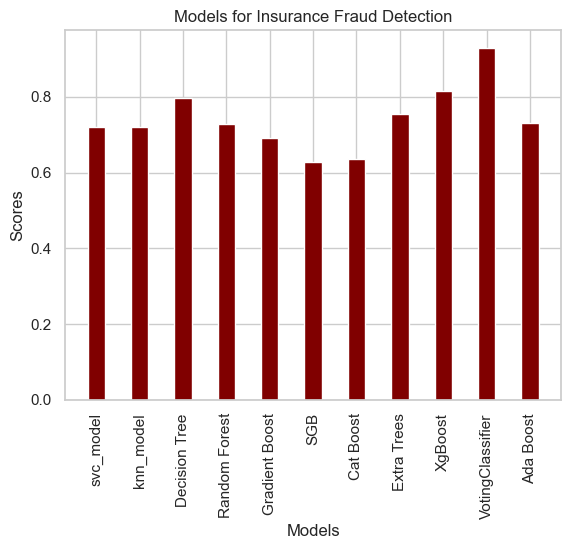

In [64]:
plt.bar(models [ 'Model'], models ['Score'], width=0.4, color='maroon')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models for Insurance Fraud Detection")
plt.show()